In [27]:
import pandas as pd
df=pd.read_csv('train.csv')

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
df.drop(columns=['Cabin'],axis=1,inplace=True)

In [31]:
df.shape

(891, 11)

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
df['Age'].fillna(df['Age'].mean().round(2),inplace=True)

In [35]:
df['Embarked'].dropna(inplace=True)

## 1 What is the average age of passengers grouped by sex?

<Axes: ylabel='Age'>

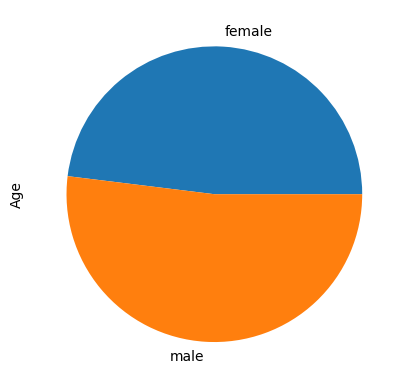

In [37]:
df.groupby('Sex')['Age'].mean().plot(kind='pie')

## 2 What is the survival rate for each class (Pclass)?

In [39]:
survive=df[df['Survived']==1]

In [163]:
v=df['Pclass'].value_counts()

In [179]:
survival_rate=survive['Pclass'].value_counts()/v*100

In [181]:
survival_rate

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: count, dtype: float64

<Axes: xlabel='Pclass'>

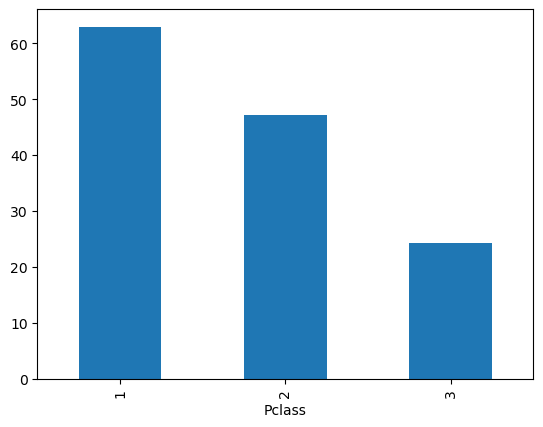

In [185]:
sbs.plot(kind='bar')

## 3 Display survival rate by Pclass and Sex using groupby and unstack.

In [203]:
y=df[['Pclass','Sex']].value_counts()

In [205]:
y

Pclass  Sex   
3       male      347
        female    144
1       male      122
2       male      108
1       female     94
2       female     76
Name: count, dtype: int64

In [217]:
rate=(df.groupby(['Pclass','Sex'])['Survived'].sum()/y*100).unstack()

<Axes: xlabel='Pclass'>

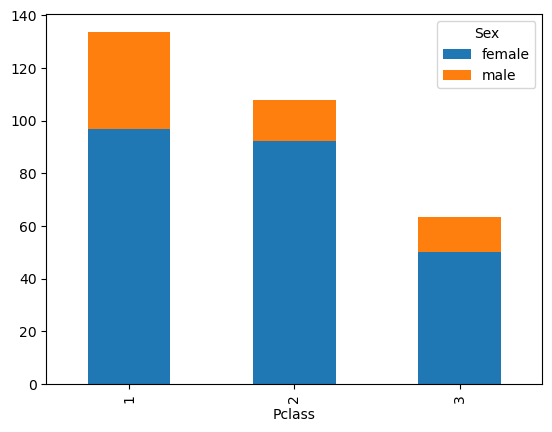

In [219]:
rate.plot(kind='bar',stacked=True)

## 4 Create a crosstab of Survival and Sex.


In [44]:
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


## 5 Create a crosstab with percentages of Survival and Pclass.

<Axes: xlabel='Survived'>

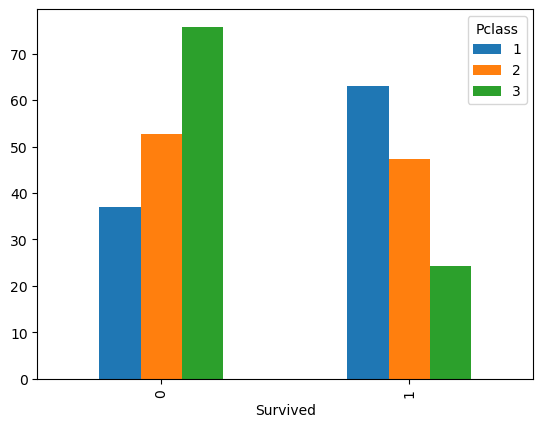

In [249]:
(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns').round(4)*100).plot(kind='bar')

## 6 Create a pivot table showing average age for each combination of Pclass and Sex.


In [48]:
df_pivot=df.pivot_table(index='Pclass',columns='Sex',values='Age',aggfunc='mean')

In [49]:
df_pivot

Sex,female,male
Pclass,,
1,34.141489,39.287869
2,28.748684,30.653981
3,24.068750,27.372392


## 7 How many passengers survived from each port of embarkation

In [187]:
Em=survive['Embarked'].value_counts()

<Axes: xlabel='Embarked'>

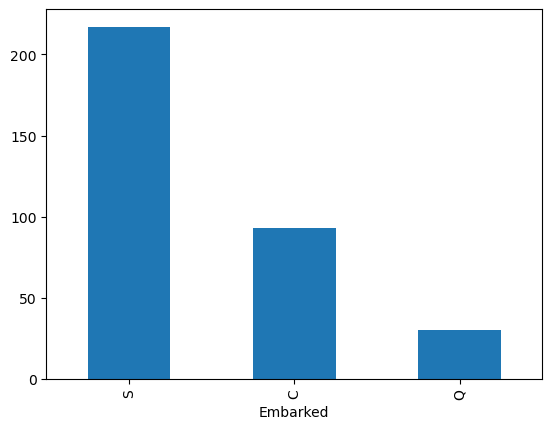

In [251]:
Em.plot(kind='bar')

## 8  Use pivot_table to get the average fare paid by Pclass and Sex.


In [53]:
avg_far=df.pivot_table(index='Sex',columns='Pclass',values='Fare',aggfunc='mean')

In [54]:
avg_far

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


## 9 What is the total number of survivors per gender using groupby?


<Axes: xlabel='Sex'>

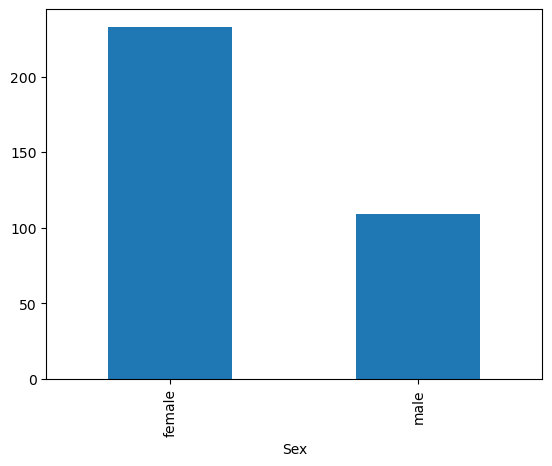

In [253]:
survive.groupby('Sex')['Survived'].count().plot(kind='bar')

## 10 Display survival rate per Embarked location using crosstab

In [260]:
(pd.crosstab(df['Survived'],df['Embarked'])/df['Embarked'].value_counts())*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


## 11 Plot the count of passengers by class using a bar chart.

<Axes: xlabel='Pclass'>

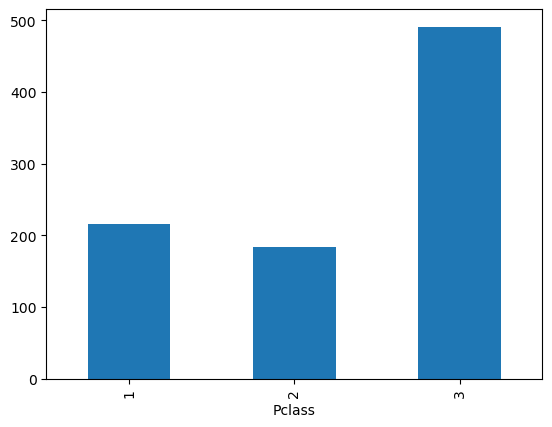

In [270]:
df.groupby('Pclass')['PassengerId'].count().plot(kind='bar')

## 12 Plot survival count by gender using seaborn countplot.

<Axes: xlabel='Sex', ylabel='count'>

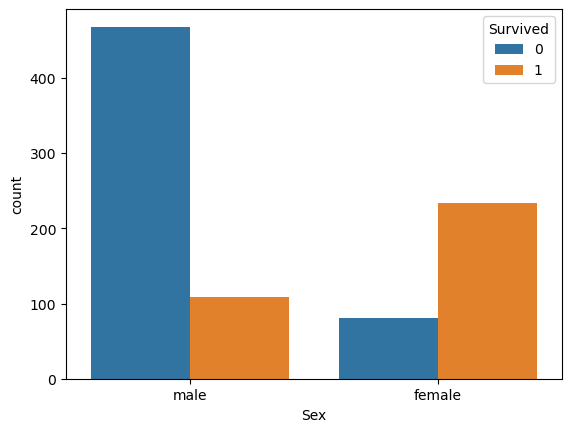

In [268]:
sns.countplot(x='Sex',data=df,hue='Survived')

## 13 Plot the number of passengers per Embarked location.


In [104]:
x=df.groupby('Embarked')['PassengerId'].count()

In [106]:
import seaborn as sns

<Axes: xlabel='Embarked', ylabel='PassengerId'>

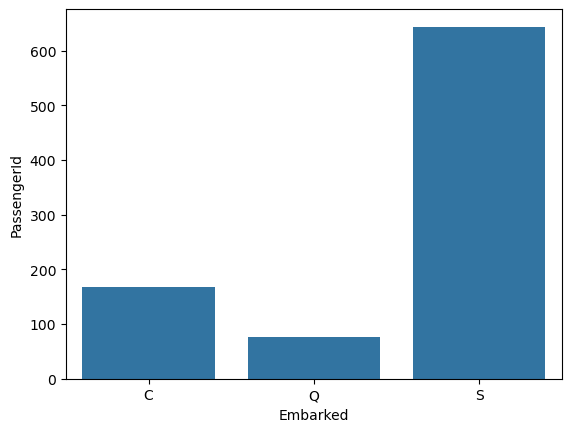

In [108]:
sns.barplot(x)

## 14 Create a bar chart showing average fare per clas

<Axes: xlabel='Pclass'>

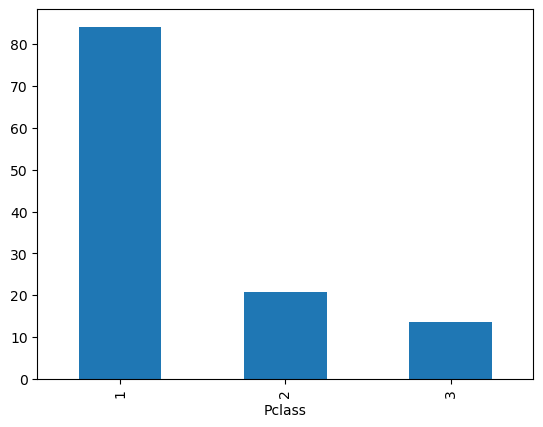

In [111]:
df.groupby('Pclass')['Fare'].mean().plot(kind='bar')

## 15Create a horizontal bar chart of survival count by Pclass

<Axes: ylabel='Pclass'>

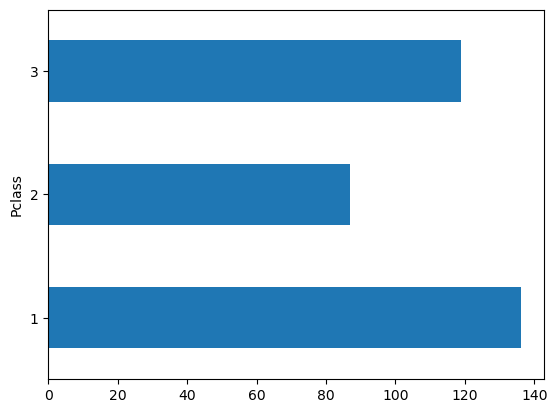

In [116]:
survive.groupby('Pclass')['Survived'].count().plot(kind='barh')

## 16 Plot a histogram of passenger ages.

<Axes: xlabel='Age', ylabel='Count'>

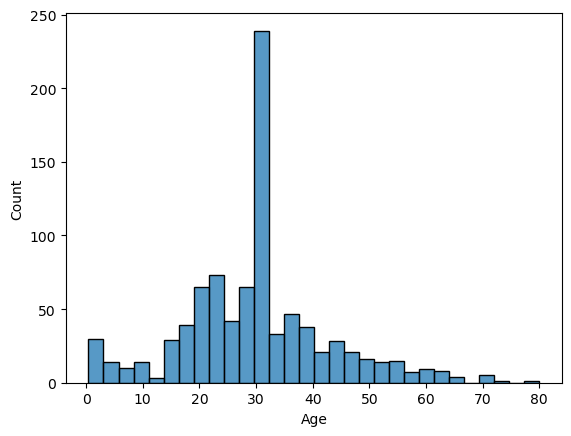

In [121]:
sns.histplot(df['Age'])

## 17 Plot a histogram of fare distribution.

<Axes: xlabel='Fare', ylabel='Count'>

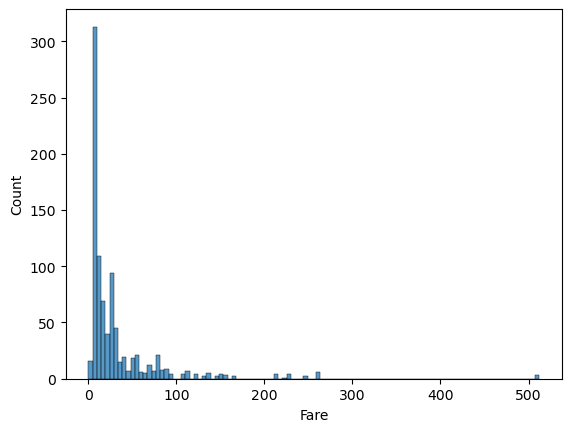

In [124]:
sns.histplot(df['Fare'])

## 18 Overlay histogram for Age of Survivors vs Non-Survivors.

In [278]:
import matplotlib.pyplot as plt

In [280]:
x=df[df['Survived']==1]['Age']
y=df[df['Survived']==0]['Age']

(array([ 18.,  16.,  99., 235.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <BarContainer object of 10 artists>)

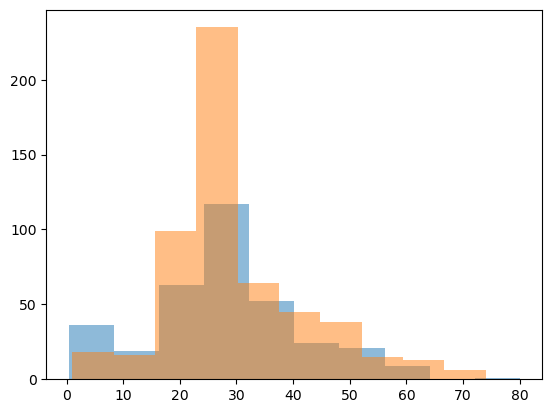

In [282]:
plt.hist(x,alpha=0.5,label='Survived')
plt.hist(y,alpha=0.5,label='Non survived')

## 19 Create a boxplot of Age by Pclass.

In [142]:
df['Age group']=df['Age'].apply(lambda x:'0-30' if x>0 and x<30 else('31-60' if x>30 and x<60 else '61-100'))

In [144]:
box=df.pivot_table(index='Pclass',columns='Age group',values='PassengerId',aggfunc='count')

<Axes: xlabel='Pclass', ylabel='Age'>

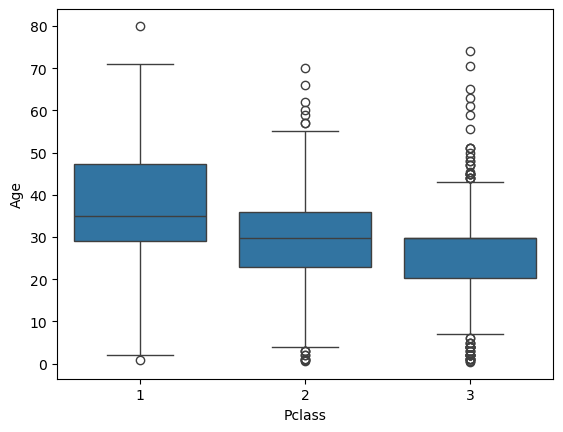

In [299]:
sns.boxplot(df,x='Pclass',y='Age')

## 20 Create a boxplot of Fare by Embarked.

<Axes: xlabel='Embarked', ylabel='Fare'>

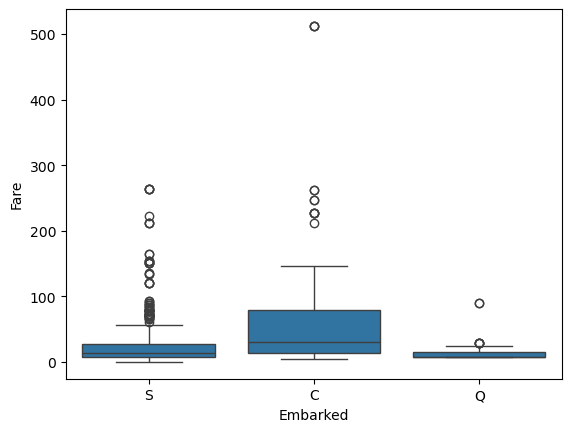

In [290]:
sns.boxplot(data=df,x='Embarked',y='Fare')

## 21 Create a boxplot of Fare grouped by Survival status.

In [231]:
df['Fare group']=df['Fare'].apply(lambda x:'0-100' if x>0 and x<100 else('101-200' if x>100 and x<200 else('201-300' if x>200 and x<300 else('301-400' if x>300 and x<400 else ('401-500' if x>400 and x>500 else '500+')))))

<Axes: xlabel='Survived', ylabel='Fare'>

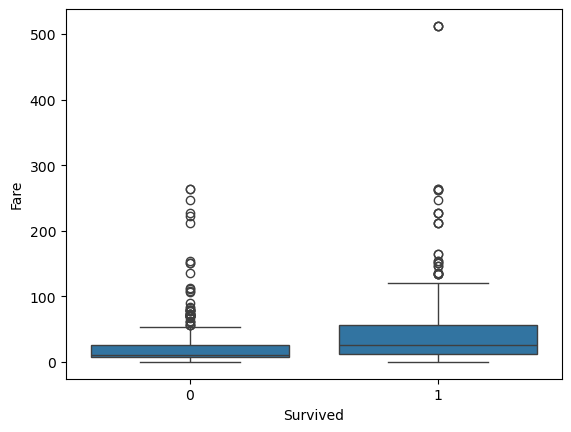

In [297]:
sns.boxplot(data=df,x='Survived',y='Fare')

## 22 Create a scatterplot of Age vs Fare.

<Axes: xlabel='Age', ylabel='Fare'>

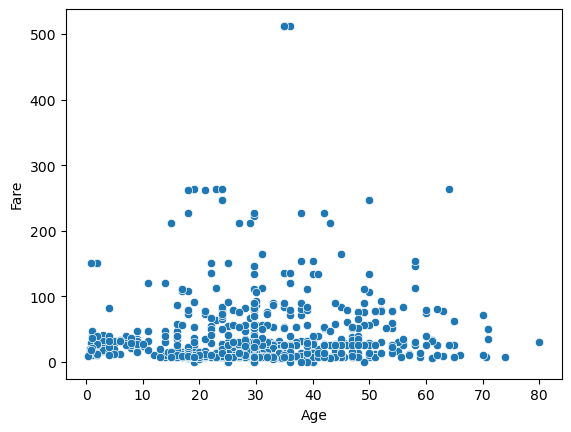

In [301]:
sns.scatterplot(df,x='Age',y='Fare')

## 23 Create a scatterplot of Age vs Fare colored by Survived.

<Axes: xlabel='Age', ylabel='Fare'>

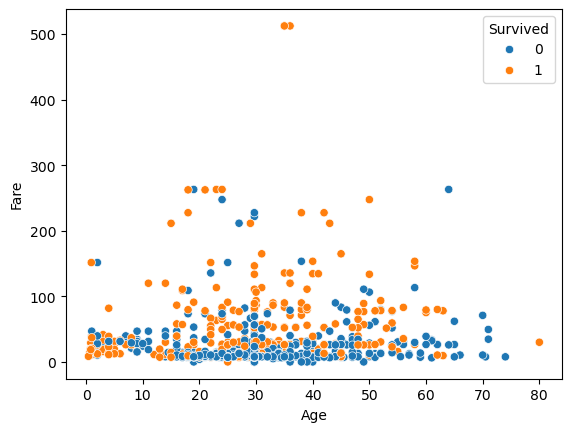

In [312]:
sns.scatterplot(df,x='Age',y='Fare',hue='Survived')

## 24 Create a scatterplot with size based on Pclass.

<Axes: xlabel='Age', ylabel='Fare'>

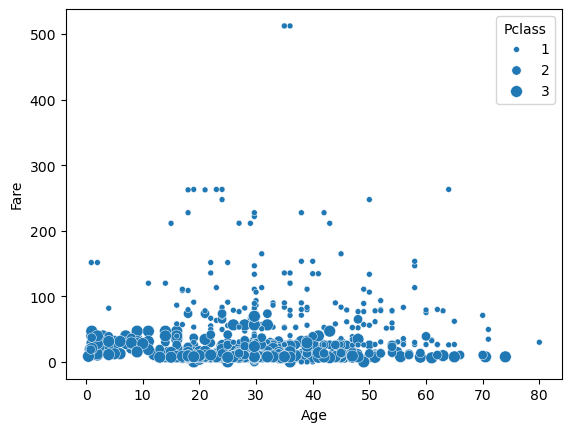

In [324]:
sns.scatterplot(df,x='Age',y='Fare',size='Pclass')

## 25 Create a correlation heatmap of numeric features

<Axes: >

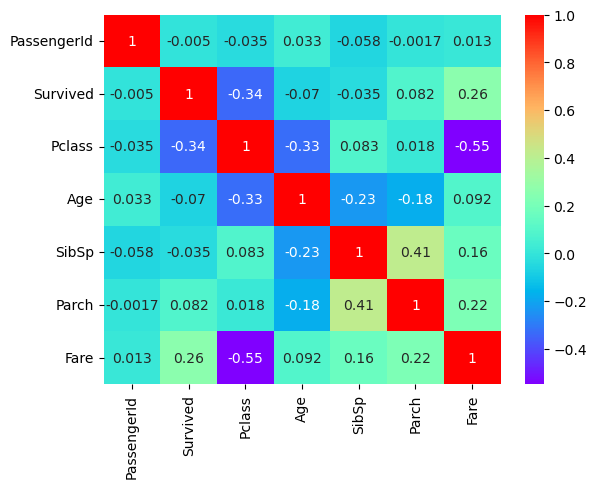

In [334]:
sns.heatmap(df.corr(numeric_only=True),cmap='rainbow',annot=True)

## 26 Create a heatmap of pivot table showing survival rate by Pclass and Sex.

In [347]:
pi=df.pivot_table(index='Pclass',columns='Sex',values='Survived',aggfunc=sum)

In [349]:
pi

Sex,female,male
Pclass,,
1,91,45
2,70,17
3,72,47


<Axes: xlabel='Sex', ylabel='Pclass'>

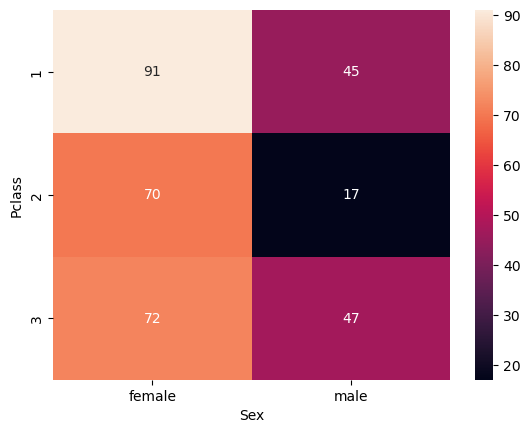

In [355]:
sns.heatmap(pi,annot=True)

## 28 Create a line chart of average age over passenger index.

<Axes: xlabel='Age'>

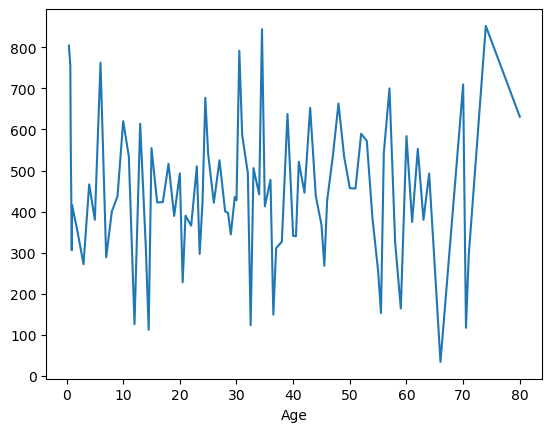

In [359]:
df.groupby('Age')['PassengerId'].mean().plot(kind='line')

## 30 Create a line plot of average fare over sorted age.

<Axes: >

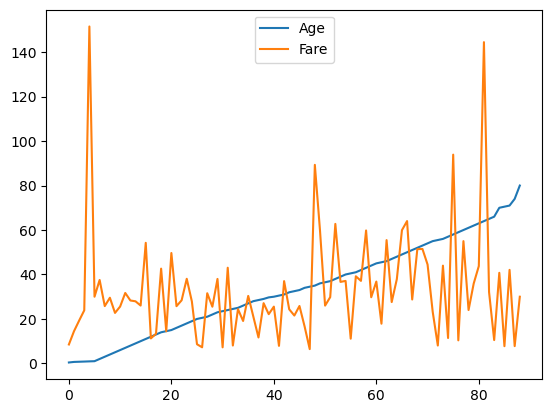

In [410]:
df.groupby('Age')['Fare'].mean().reset_index().plot()

## 31 Find the gender with higher average survival rate

In [412]:
df.groupby('Sex')['Survived'].mean().idxmax()

'female'

## 32 Compare age distribution of survivors vs non-survivors using KDE plot.

Survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

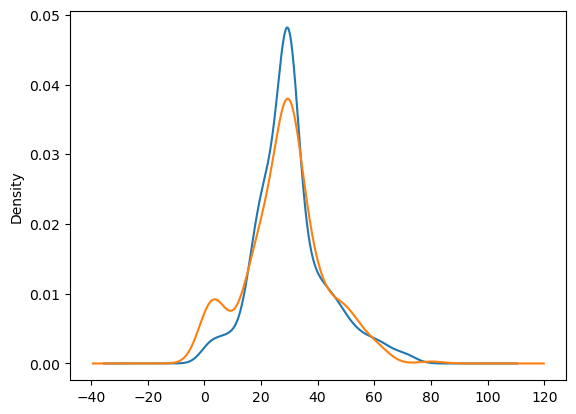

In [402]:
df.groupby('Survived')['Age'].plot(kind='kde')

## 33 Plot fare vs age with hue on passenger class.

<Axes: xlabel='Fare', ylabel='Age'>

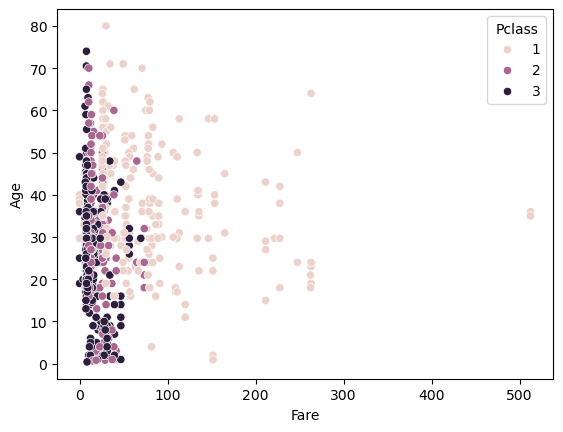

In [380]:
sns.scatterplot(df,x='Fare',y='Age',hue='Pclass')

## 34 Create a stacked bar chart of survival by gender.

<Axes: xlabel='Sex'>

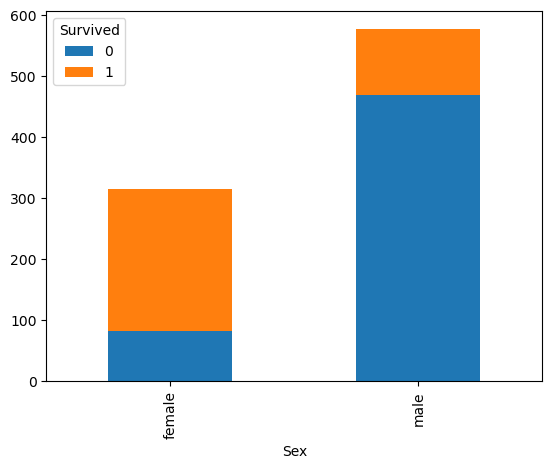

In [420]:
df.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked=True)

## 35 Create a violin plot of age by Pclass.

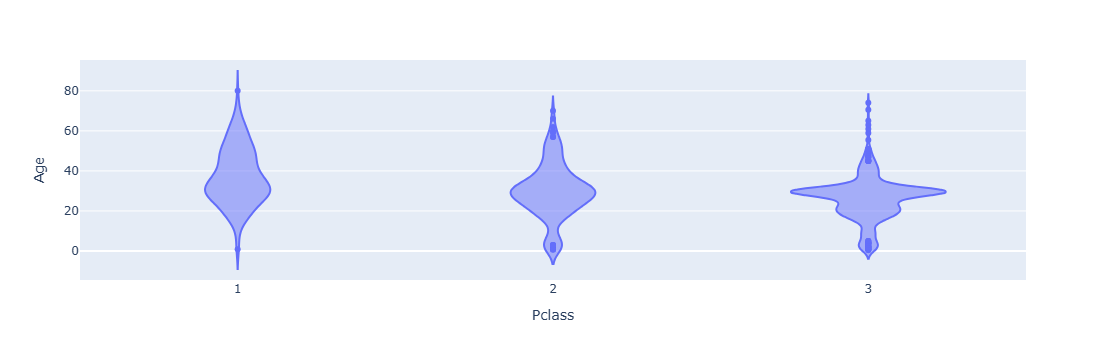

In [422]:
px.violin(df,x='Pclass',y='Age')